In [1]:
import pandas as pd

In [7]:
# El link de la Api no me quizo funcionar. Para ello utilice el link directo que se utiliza para descargar el archivo.
datos = pd.read_csv("https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv", low_memory=False)


In [8]:
datos

,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,Otro,NaN
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,Otro,NaN
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,Otro,NaN
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533098,533139,2020-08-14T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,63,F,En estudio,Leve,NaN,2020-08-14T00:00:00.000,NaN,2020-08-20T00:00:00.000,NaN,2020-08-22T00:00:00.000,NaN,11,NaN,NaN,NaN
533099,533140,2020-08-16T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,41,F,En estudio,Leve,NaN,2020-08-16T00:00:00.000,NaN,2020-08-21T00:00:00.000,NaN,2020-08-22T00:00:00.000,NaN,11,NaN,NaN,NaN
533100,533141,2020-08-16T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Hospital,77,M,En estudio,Moderado,NaN,2020-08-11T00:00:00.000,NaN,2020-08-20T00:00:00.000,NaN,2020-08-22T00:00:00.000,NaN,11,NaN,NaN,NaN
533101,533142,2020-08-17T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Casa,62,F,En estudio,Leve,NaN,2020-08-11T00:00:00.000,NaN,2020-08-20T00:00:00.000,NaN,2020-08-22T00:00:00.000,NaN,11,NaN,NaN,NaN


In [11]:
datos.dtypes

ID de caso                           int64
Fecha de notificación               object
Código DIVIPOLA                      int64
Ciudad de ubicación                 object
Departamento o Distrito             object
atención                            object
Edad                                 int64
Sexo                                object
Tipo                                object
Estado                              object
País de procedencia                 object
FIS                                 object
Fecha de muerte                     object
Fecha diagnostico           datetime64[ns]
Fecha recuperado                    object
fecha reporte web           datetime64[ns]
Tipo recuperación                   object
Codigo departamento                  int64
Codigo pais                        float64
Pertenencia etnica                  object
Nombre grupo etnico                 object
dtype: object

In [12]:
datos["Fecha diagnostico"] = pd.to_datetime(datos["Fecha diagnostico"].values, format="%Y-%m-%dT%H:%M:%S.000")
datos["fecha reporte web"] = pd.to_datetime(datos["fecha reporte web"].values, format="%Y-%m-%dT%H:%M:%S.000")

In [13]:
datos.dtypes

ID de caso                           int64
Fecha de notificación               object
Código DIVIPOLA                      int64
Ciudad de ubicación                 object
Departamento o Distrito             object
atención                            object
Edad                                 int64
Sexo                                object
Tipo                                object
Estado                              object
País de procedencia                 object
FIS                                 object
Fecha de muerte                     object
Fecha diagnostico           datetime64[ns]
Fecha recuperado                    object
fecha reporte web           datetime64[ns]
Tipo recuperación                   object
Codigo departamento                  int64
Codigo pais                        float64
Pertenencia etnica                  object
Nombre grupo etnico                 object
dtype: object

In [14]:
datos.groupby(["fecha reporte web"]).size()

fecha reporte web
2020-03-06        1
2020-03-09        2
2020-03-11        6
2020-03-12        5
2020-03-13        5
              ...  
2020-08-18    12462
2020-08-19    13056
2020-08-20    11541
2020-08-21     8419
2020-08-22    10965
Length: 167, dtype: int64

In [15]:
datos.groupby(["Fecha diagnostico","Ciudad"]).size()

fecha reporte web  Fecha diagnostico
2020-03-06         2020-03-06              1
2020-03-09         2020-03-09              2
2020-03-11         2020-03-11              6
2020-03-12         2020-03-12              5
2020-03-13         2020-03-13              5
                                        ... 
2020-08-22         2020-08-18             50
                   2020-08-19            396
                   2020-08-20           1724
                   2020-08-21           6196
                   2020-08-22            674
Length: 2155, dtype: int64

In [49]:
datos.groupby(["Fecha diagnostico"]).size()

Fecha diagnostico
2020-03-06        1
2020-03-09        2
2020-03-11        6
2020-03-12        5
2020-03-13        5
              ...  
2020-08-18     6754
2020-08-19    12325
2020-08-20    10217
2020-08-21     7143
2020-08-22      674
Length: 167, dtype: int64

In [18]:
nuevos_casos = datos.groupby(["Fecha diagnostico"]).size()
nuevos_casos.values

array([    1,     2,     6,     5,     5,    18,    16,    14,    25,
          12,    26,    48,    34,    29,    73,   105,    61,    10,
          49,    69,    94,    96,   107,   160,    96,   107,   139,
          79,    98,   129,   349,   172,   250,   235,    67,    75,
         126,   125,   128,   205,   184,   174,   182,   171,   194,
         195,   304,   262,   236,   218,   355,   260,   310,   482,
         277,   422,   307,   642,   348,   500,   595,   445,   571,
         553,   659,   659,   681,   606,   727,   647,   719,   641,
         778,   650,   810,  1022,  1005,   804,  1027,  1105,  1260,
        1328,  1557,  1149,  1133,  1299,  1515,  1723,  1470,  1373,
        1216,  1472,  1383,  1628,  1948,  1259,  2224,  2268,  1668,
        2287,  1550,  3057,  3077,  2515,  2868,  3057,  3181,  2797,
        3574,  4611,  4278,  3842,  2186,  2089,  4567,  4341,  3977,
        4530,  3958,  3707,  5189,  4814,  6533,  7670,  6766,  5614,
        7445,  7903,

In [19]:
d = {'Fecha':nuevos_casos.index, "NumeroCasos":nuevos_casos.values}
d

nuevosCasos = pd.DataFrame(data = d)
nuevosCasos

,Fecha,NumeroCasos
0,2020-03-06,1
1,2020-03-09,2
2,2020-03-11,6
3,2020-03-12,5
4,2020-03-13,5
...,...,...
162,2020-08-18,6754
163,2020-08-19,12325
164,2020-08-20,10217
165,2020-08-21,7143


In [20]:
datos.groupby(["Estado"]).size()

Estado
Asintomático     61072
Fallecido        16933
Grave             2158
Leve            431553
Moderado         20267
dtype: int64

In [21]:
datos.size

11195163

In [22]:
datos.groupby(["atención"]).size()

atención
Casa            134715
Fallecido        16968
Hospital         18562
Hospital UCI      1990
Recuperado      359792
dtype: int64

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

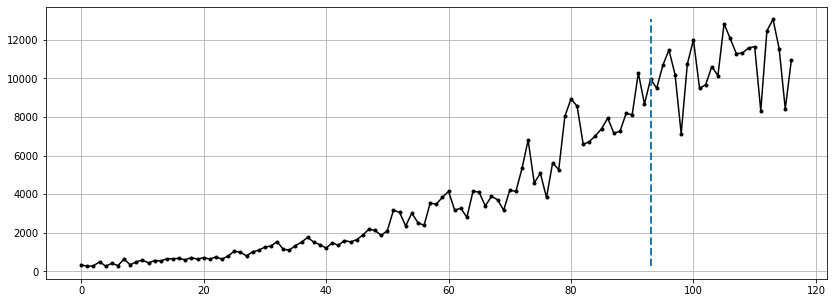

In [25]:

nuevos_casos_web =  datos.groupby(["fecha reporte web"]).size() 
nuevos_casos = datos.groupby(["Fecha diagnostico"]).size() 
data = nuevos_casos_web.values.tolist()[50:]
data2 = nuevos_casos.values.tolist()

plt.figure(figsize=(14,5))
plt.plot(data, '.-k')
#plt.plot(data2, '.-r')
plt.grid()

# linea vertical para dividir el entrenamiento
# del pronóstico
plt.plot([len(data)-24, len(data)-24], [min(data), max(data)], '--', linewidth=2);

# Como se define ese número 24?

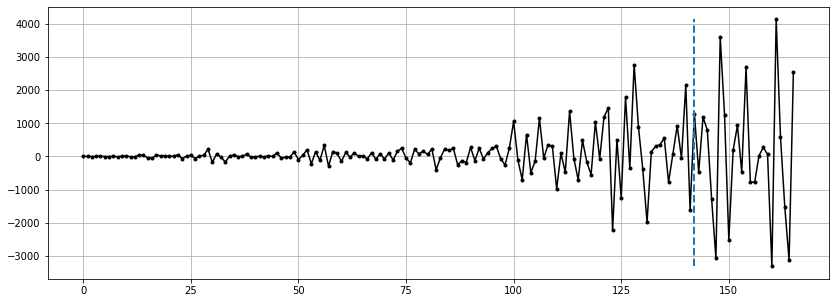

In [26]:
# Modelo pronostico serie transformada
data = nuevos_casos_web.values.tolist()
# Se remueve la tendencia - ¿Por qué se debe remover la tendencia?
data_d1 = [data[t] - data[t-1]  for t in range(1, len(data))]

plt.figure(figsize=(14,5))
plt.plot(data_d1, '.-k')
plt.grid()
plt.plot([len(data_d1)-24, len(data_d1)-24], [min(data_d1), max(data_d1)], '--', linewidth=2);

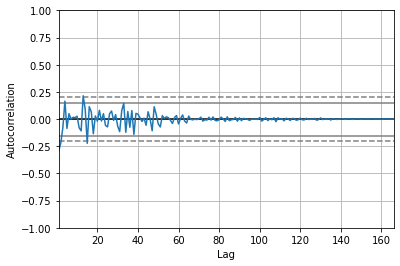

In [27]:
# Se verifica la componente ciclica
# ¿Que significa esta función? y ¿Por qué se debe eliminar la componente ciclica?

pd.plotting.autocorrelation_plot(data_d1);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


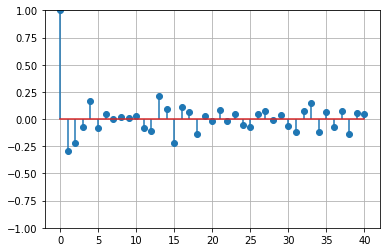

In [28]:
from statsmodels.tsa.stattools import acf, pacf

def acf_plot(z):
    acf_data = acf(z, fft=False)
    plt.stem(range(len(acf_data)), acf_data, use_line_collection=True)
    plt.ylim(-1, 1),
    plt.grid();

def pacf_plot(z):
    pacf_data = pacf(z)
    plt.stem(range(len(pacf_data)), pacf_data, use_line_collection=True)
    plt.ylim(-1, 1);
    plt.grid();

acf_plot(data_d1)


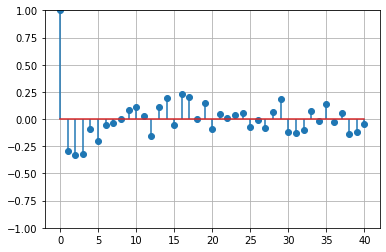

In [29]:
pacf_plot(data_d1)

In [30]:
from sklearn.preprocessing import MinMaxScaler

# crea el transformador
scaler = MinMaxScaler()

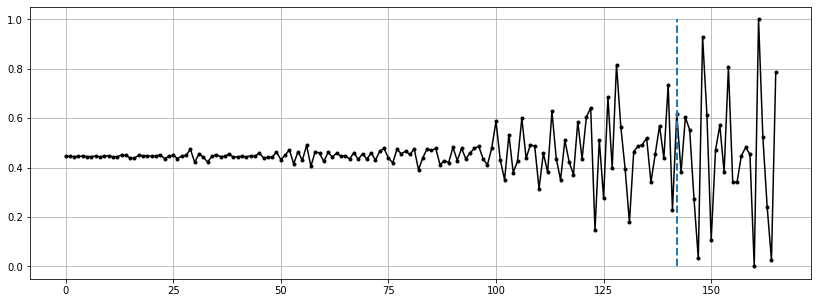

In [31]:
# se escalan los valores

# Se escalan los valores como en el caso anaterior - ¿Por qué se debe escalar?
#
scaler = MinMaxScaler()
data_d1_scaled = scaler.fit_transform( np.array(data_d1).reshape(-1, 1))
data_d1_scaled = [u[0] for u in data_d1_scaled]

#
# Se verifica visualmente el escalamiento
#
plt.figure(figsize=(14,5))
plt.plot(data_d1_scaled, '.-k')
plt.grid();
plt.plot([len(data_d1_scaled)-24, len(data_d1_scaled)-24], [min(data_d1_scaled), max(data_d1_scaled)], '--', linewidth=2);

In [32]:

P = 10

X = []
for t in range(P-1, len(data_d1_scaled)-1):
    X.append([data_d1_scaled[t-n] for n in range(P) ])

d = data_d1_scaled[P:]

In [36]:
X

[[0.4469056249160961,
  0.4432809773123909,
  0.4465028862934622,
  0.4447576855953819,
  0.4447576855953819,
  0.44677137870855144,
  0.4450261780104712,
  0.4448919318029265,
  0.44556316284064973,
  0.4451604242180158],
 [0.4479795945764532,
  0.4469056249160961,
  0.4432809773123909,
  0.4465028862934622,
  0.4447576855953819,
  0.4447576855953819,
  0.44677137870855144,
  0.4450261780104712,
  0.4448919318029265,
  0.44556316284064973],
 [0.44314673110484626,
  0.4479795945764532,
  0.4469056249160961,
  0.4432809773123909,
  0.4465028862934622,
  0.4447576855953819,
  0.4447576855953819,
  0.44677137870855144,
  0.4450261780104712,
  0.4448919318029265],
 [0.44435494697274797,
  0.44314673110484626,
  0.4479795945764532,
  0.4469056249160961,
  0.4432809773123909,
  0.4465028862934622,
  0.4447576855953819,
  0.4447576855953819,
  0.44677137870855144,
  0.4450261780104712],
 [0.45093301114243517,
  0.44435494697274797,
  0.44314673110484626,
  0.4479795945764532,
  0.446905624916

In [37]:
len(data_d1_scaled)

166

In [38]:
len(X)

156

In [39]:
len(d)

156

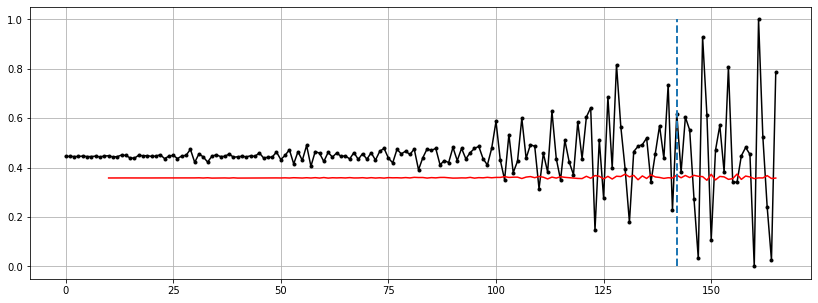

In [40]:
from sklearn.neural_network import MLPRegressor


#MLPRefressor - Revisar los hiperparametros

H = 1 # Se escoge arbitrariamente

np.random.seed(123456)

mlp = MLPRegressor(
    hidden_layer_sizes=(H, ),
    activation = 'logistic',
    learning_rate = 'adaptive',
    momentum = 0.0,
    learning_rate_init = 0.002,
    max_iter = 100000)

# Entrenamiento
mlp.fit(
    X[0:132],  # 156 - 24 = 132
    data_d1_scaled[0:132]
)

# Pronostico
y_d1_scaled_m2 = mlp.predict(X)


plt.figure(figsize=(14,5))
plt.plot(data_d1_scaled, '.-k')
plt.grid()

# No hay pronóstico para los primeros 13 valores
# de la serie
plt.plot([None] * P + y_d1_scaled_m2.tolist(), '-r');

# linea vertical para dividir el entrenamiento
# del pronóstico
plt.plot([len(data_d1_scaled)-24, len(data_d1_scaled)-24], [min(data_d1_scaled), max(data_d1_scaled)], '--', linewidth=2);

In [41]:
#
# La gráfica anterior no es comparativa. Se realizan las
# transformaciones inversas a las realizadas
#
y_d1_scaled_m2 = data_d1_scaled[0:P] + y_d1_scaled_m2.tolist()

y_d1_m2 = scaler.inverse_transform([[u] for u in y_d1_scaled_m2])
y_d1_m2 = [u[0] for u in y_d1_m2.tolist()]

y_d1_m2 = [y_d1_m2[t] + data_d1[t]  for t in range(len(y_d1_m2))]
#y_d1_m2 = data_d1[0:12] + y_d1_m2

y_m2 = [y_d1_m2[t] + data[t]  for t in range(len(y_d1_m2))]

y_m2 = [data[0]] + y_m2

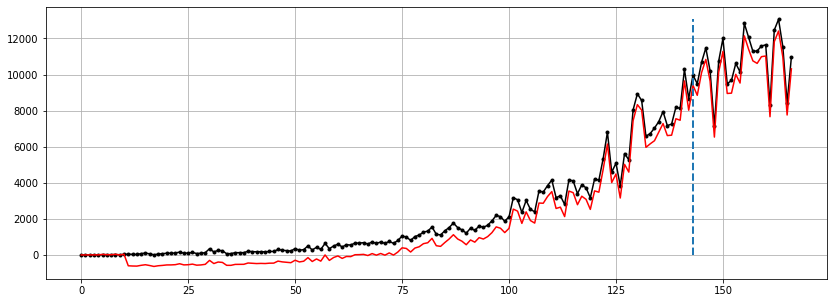

In [42]:

plt.figure(figsize=(14,5))
plt.plot(data, '.-k')
plt.grid()

plt.plot(y_m2, '-r');

# linea vertical para dividir el entrenamiento
# del pronóstico. Se ubica en el ultimo dato
# usando para entrenamiento
plt.plot([len(data)-24, len(data)-24], [min(data), max(data)], '--', linewidth=2);

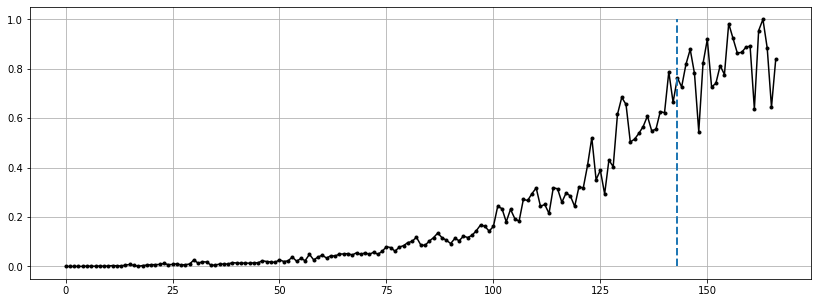

In [43]:
# Modelo sin transformar


from sklearn.preprocessing import MinMaxScaler

# crea el transformador
scaler = MinMaxScaler()

# escala la serie
data_scaled = scaler.fit_transform( np.array(data).reshape(-1, 1))
# z es un array de listas como efecto
# del escalamiento
data_scaled = [u[0] for u in data_scaled]

plt.figure(figsize=(14,5))
plt.plot(data_scaled, '.-k')
plt.grid()
plt.plot([len(data_scaled)-24, len(data_scaled)-24], [min(data_scaled), max(data_scaled)], '--', linewidth=2);

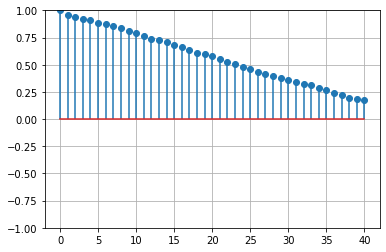

In [44]:
acf_plot(data)

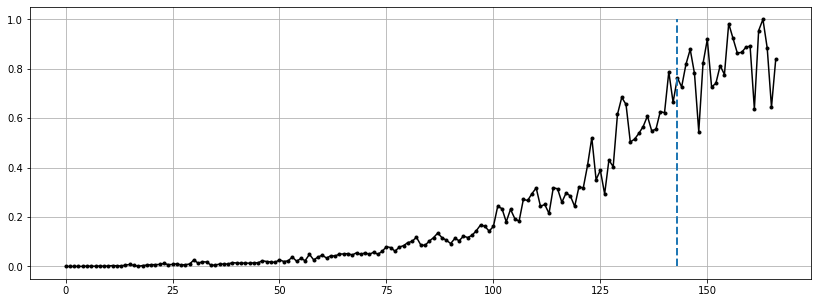

In [45]:
#
# Como primer paso se escala la serie al intervalo [0, 1]
# ya que esto facilita el entrenamiento del modelo
#
from sklearn.preprocessing import MinMaxScaler

# crea el transformador
scaler = MinMaxScaler()

# escala la serie
data_scaled = scaler.fit_transform( np.array(data).reshape(-1, 1))
# z es un array de listas como efecto
# del escalamiento
data_scaled = [u[0] for u in data_scaled]

plt.figure(figsize=(14,5))
plt.plot(data_scaled, '.-k')
plt.grid()
plt.plot([len(data_scaled)-24, len(data_scaled)-24], [min(data_scaled), max(data_scaled)], '--', linewidth=2);

In [46]:

P = 13

X = []
for t in range(P-1, len(data)-1):
    X.append([data_scaled[t-n] for n in range(P) ])

observed_scaled = data_scaled[P:]

In [47]:
len(X)

154

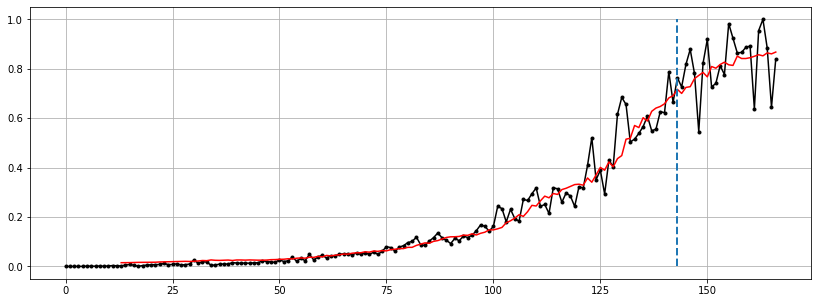

In [48]:
from sklearn.neural_network import MLPRegressor

np.random.seed(123456)

H = 1 # Se escoge arbitrariamente

mlp = MLPRegressor(
    hidden_layer_sizes=(H, ),
    activation = 'logistic',
    learning_rate = 'adaptive',
    momentum = 0.0,
    learning_rate_init = 0.1,
    max_iter = 10000)

# Entrenamiento
mlp.fit(
    X[0:180],  # 104 - 24 = 180
    observed_scaled[0:180]
)

# Pronostico
y_scaled_m1 = mlp.predict(X)

plt.figure(figsize=(14,5))
plt.plot(data_scaled, '.-k')
plt.grid()

# No hay pronóstico para los primeros 13 valores
# de la serie
plt.plot([None] * P + y_scaled_m1.tolist(), '-r');

# linea vertical para dividir el entrenamiento
# del pronóstico. Se ubica en el ultimo dato
# usando para entrenamiento
plt.plot([len(data_scaled)-24, len(data_scaled)-24], [min(data_scaled), max(data_scaled)], '--', linewidth=2);

In [62]:
mlp.predict([ayer, a,   ... t-13])